<a href="https://colab.research.google.com/github/MCHGR/codigos-sensores/blob/main/primer_modelo_primerdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
ruta_Drag1 = "/content/drive/MyDrive/dataset/dataset/real/images/Drag"
Drag_train = []
img_size = 150

for img in os.listdir(ruta_Drag1):
  img = cv2.imread(os.path.join(ruta_Drag1,img))
 # img = os.path.join(ruta_Drag1,img)
#img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img,(img_size,img_size))
  Drag_train.append([img_gray_resize])
#  print(len(Drag_train))
#  print(Drag_train)

In [ ]:
ruta_Loupe1 = "/content/drive/MyDrive/dataset/dataset/real/images/Loupe"
Loupe_train = []
img_size2 = 150

for img2 in os.listdir(ruta_Loupe1):
  img2 = cv2.imread(os.path.join(ruta_Loupe1,img))
# img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_gray_resize2 = cv2.resize(img2,(img_size2,img_size2))
  Loupe_train.append([img_gray_resize2])
#  print(len(Drag_train))
#  print(Drag_train)

In [ ]:
Loupe_train = np.array(Loupe_train)
# Loupe_train.shape = (2000, 150, 150, 3)
print(Loupe_train.shape)

(2000, 150, 150, 3)


In [ ]:
Drag_train = np.array(Drag_train)
Drag_train.shape = (2000, 150, 150, 3)
n = Drag_train.shape[0]
print(Drag_train.shape)
print(n)

(2000, 150, 150, 3)
2000


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
plt.axis("off")
plt.imshow(load_img(img[1]))


In [ ]:
train = Drag_train[:1000]
val = Drag_train[1000:1600]
test = Drag_train[1600:2000]
print(train.shape, val.shape, test.shape)

(1000, 150, 150, 3) (600, 150, 150, 3) (400, 150, 150, 3)


In [ ]:
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(train_labels)
#y_test = to_categorical(test_labels)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(2, activation="softmax")  
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
x_val = val
partial_x_train = train
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))  

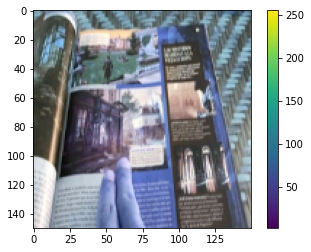

In [ ]:
plt.figure()
plt.imshow(np.squeeze(train[1]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
images = np.concatenate([Loupe_train,Drag_train])
print(len(images))
Images = np.array(images)
print(Images.shape)

4000
(4000, 150, 150, 3)


In [ ]:
etiquetas_Loupe = np.repeat(0,2000)
print(len(etiquetas_Loupe))
print(etiquetas_Loupe)

2000
[0 0 0 ... 0 0 0]


In [ ]:
etiquetas_Drag = np.repeat(1,2000)
print(len(etiquetas_Drag))
print(etiquetas_Drag)

2000
[1 1 1 ... 1 1 1]


In [ ]:
class_names = ["Loupe","Drag"]

In [ ]:
labels = np.concatenate([etiquetas_Loupe, etiquetas_Drag])
print(labels.shape)
print(labels)
Labels = np.array(labels)
print(Labels[3999])

(4000,)
[0 0 0 ... 1 1 1]
1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
125/125 [==============================] - 8s 59ms/step - loss: 410.3913 - accuracy: 0.5175
Epoch 2/30
125/125 [==============================] - 7s 59ms/step - loss: 0.6935 - accuracy: 0.5000
Epoch 3/30
125/125 [==============================] - 7s 60ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 4/30
125/125 [==============================] - 8s 62ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 5/30
125/125 [==============================] - 7s 60ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/30
125/125 [==============================] - 7s 60ms/step - loss: 0.6932 - accuracy: 0.4925
Epoch 7/30
125/125 [==============================] - 7s 60ms/step - loss: 0.6932 - accuracy: 0.4950
Epoch 8/30
125/125 [==============================] - 8s 60ms/step - loss: 0.6932 - accuracy: 0.4990
Epoch 9/30
125/125 [==============================] - 7s 60ms/step - loss: 0.6932 - accuracy: 0.4975
Epoch 10/30
125/125 [==============================] - 7s 59ms/step - loss: 0.6932 - accu